In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
file_path = '../data/bank-full.csv'

df_bank= pd.read_csv( file_path, sep=';', header=0)


Describe the dataset informations

In [4]:
df_bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11966,56,entrepreneur,married,unknown,no,0,no,no,unknown,20,jun,39,8,-1,0,unknown,no
8388,41,blue-collar,married,secondary,no,-256,yes,no,unknown,3,jun,147,2,-1,0,unknown,no
15467,50,services,married,secondary,no,378,no,yes,telephone,18,jul,55,9,-1,0,unknown,no
20129,35,technician,single,secondary,no,14,no,no,cellular,11,aug,113,2,-1,0,unknown,no
34935,45,technician,married,secondary,no,115,yes,no,cellular,6,may,108,1,-1,0,unknown,no
39811,54,services,divorced,secondary,no,0,no,no,cellular,1,jun,174,1,81,2,success,yes
21002,30,technician,married,tertiary,no,910,no,no,cellular,14,aug,228,2,-1,0,unknown,no
33397,33,housemaid,married,tertiary,no,10,yes,no,cellular,20,apr,129,1,322,2,failure,no
18510,50,services,married,secondary,yes,0,no,no,telephone,31,jul,35,9,-1,0,unknown,no
7494,30,blue-collar,single,secondary,no,196,yes,no,unknown,29,may,91,7,-1,0,unknown,no


In [5]:
df_bank['job'].value_counts().count()

np.int64(12)

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

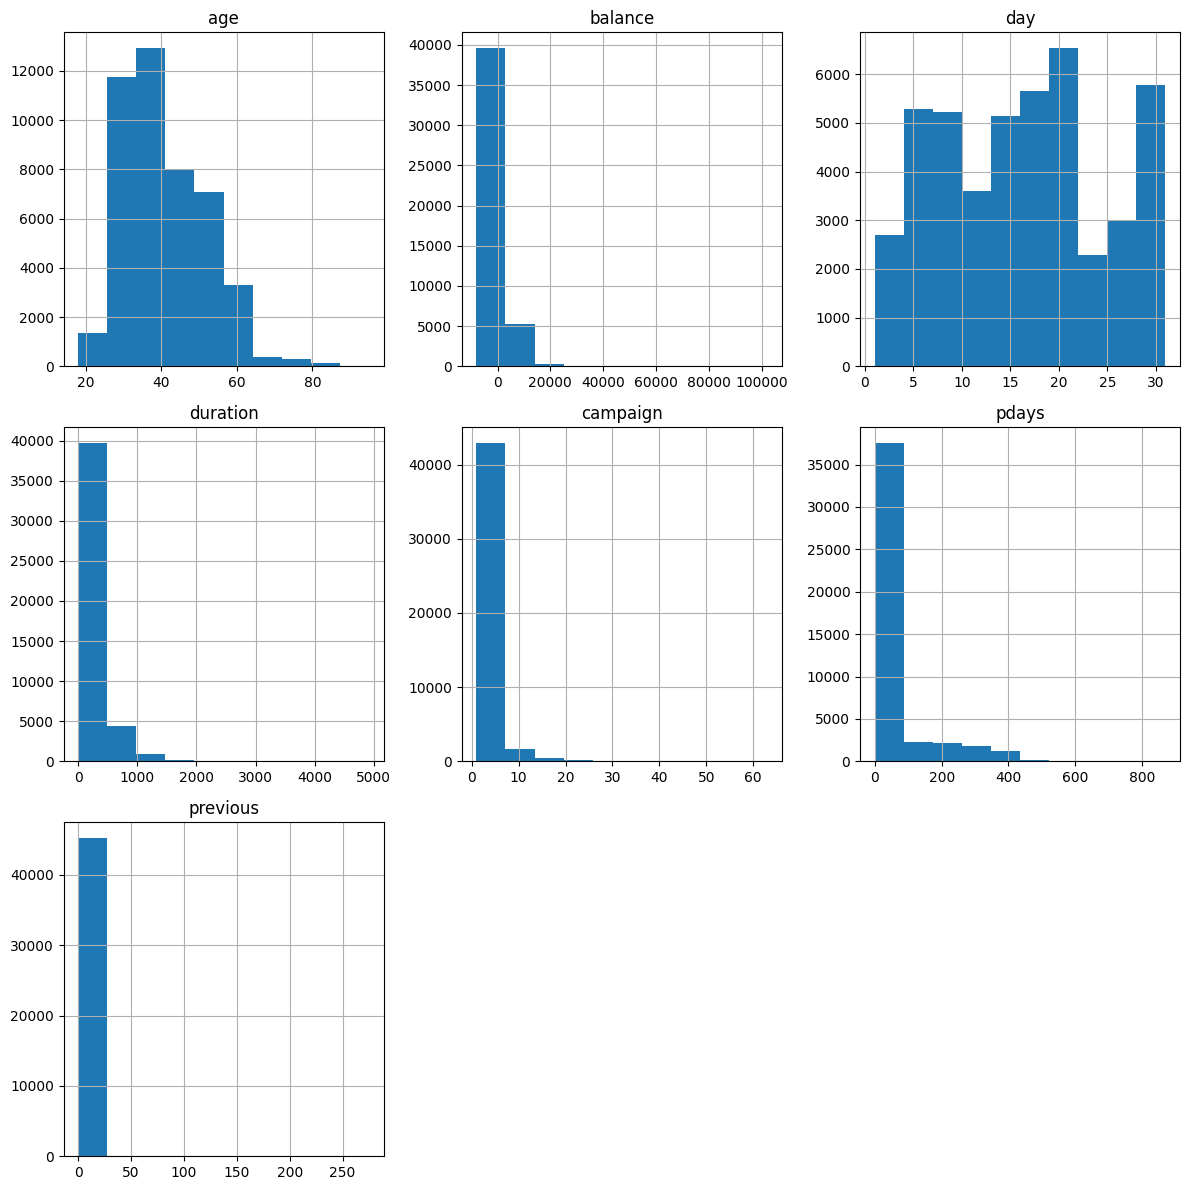

In [8]:
df_bank.hist(figsize=(12,12))
plt.tight_layout() 
plt.show()

Use heatmap to display the numerical features' correlation

<Axes: >

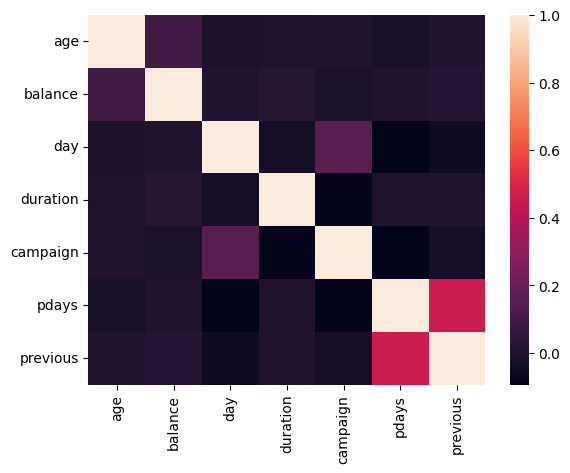

In [9]:
sns.heatmap(df_bank.corr(numeric_only = True))


Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 


<font color= 'mediumorchid'> lié à la target : si on est interessé, on reste plus longtemps au téléphone que si on ne l'est pas ! Target leark </font>

In [10]:
df_bank_2 = df_bank.drop(columns='duration')

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [11]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime

df_bank_2['dates'] = df_bank_2.day.astype(str) + '/' + df_bank_2.month + '/' + '1984'
df_bank_2


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,dates
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,5/may/1984
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,5/may/1984
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,5/may/1984
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,5/may/1984
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,5/may/1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes,17/nov/1984
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes,17/nov/1984
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes,17/nov/1984
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no,17/nov/1984


In [12]:
df_bank_2.dates = pd.to_datetime(df_bank_2.dates, dayfirst=True, format='%d/%b/%Y') 
df_bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,dates
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,1984-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,1984-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,1984-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,1984-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,1984-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes,1984-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes,1984-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes,1984-11-17
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no,1984-11-17


In [13]:
from datetime import datetime

# Extract the day number of the year
df_bank_2['day_of_year'] = df_bank_2['dates'].dt.dayofyear
df_bank_2 = df_bank_2.drop(columns=['dates', 'day', 'month'])


In [14]:
df_bank_2.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,day_of_year
2869,45,entrepreneur,married,primary,no,2418,yes,no,unknown,1,-1,0,unknown,no,135
1001,50,technician,married,secondary,no,73,no,no,unknown,1,-1,0,unknown,no,128
20559,38,technician,single,tertiary,no,508,yes,yes,cellular,2,-1,0,unknown,yes,225
12456,59,technician,married,secondary,no,0,no,no,unknown,1,-1,0,unknown,no,183
25313,51,management,married,tertiary,no,974,no,no,cellular,1,-1,0,unknown,no,323
10773,39,blue-collar,married,primary,no,2169,no,no,unknown,2,-1,0,unknown,no,169
28170,36,admin.,married,secondary,no,498,yes,no,cellular,1,253,1,failure,no,29
24362,51,blue-collar,married,secondary,no,-355,yes,yes,cellular,2,-1,0,unknown,no,322
6868,29,management,single,secondary,no,293,yes,no,unknown,2,-1,0,unknown,no,149
27079,30,blue-collar,single,primary,no,395,no,no,cellular,1,-1,0,unknown,no,326


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [15]:
X = df_bank_2.drop(columns=['y'])
y = df_bank_2['y'].map({'yes': 1, 'no': 0})


In [16]:
binary_features = [] 
for features in X.columns.tolist(): 
    if X[features].value_counts().count() == 2: 
        binary_features.append(features)

binary_features

['default', 'housing', 'loan']

In [17]:

categorical_features = X.select_dtypes('object').drop(columns=binary_features).columns.tolist()
numerical_features = X.select_dtypes(include='number').columns.tolist()

categorical_features

['job', 'marital', 'education', 'contact', 'poutcome']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [20]:
# Pipelines pour chaque type
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

cat_pipeline_bin = Pipeline([
    ('imputer_bin', SimpleImputer(strategy='most_frequent')),
    ('encoder_bin', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=3))
])

In [21]:
# Fusion dans un seul transformateur
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features),
    ('cat_bin', cat_pipeline_bin, binary_features)
])

In [22]:
preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, average_precision_score, ConfusionMatrixDisplay

In [24]:
def model_run_classification(model, 
                             str_model,
                            X_train, 
                            X_test, 
                            y_train, 
                            y_test, 
                            matrice=False):
    """
    Moèle de classification , évaluation des performances sur Train and Test.
    predict() et predict_proba()
    Affiche les résultats des métriques choisies

    Args:
        model: modèle de classification (déjà passé dans la Pipeline)
        str_model (str): nom du modèle en str
        X_train, X_test: données entrainements et test
        y_train, y_test: target jeux entrainement et test
        matrice (bool, optional): Si True, affiche la matrice de confusion. Par défaut à False.

    Métriques affichées :
        accuracy : performance moyenne sur la diagonale TP TN, métriques bof
        precision : evalue les performances d'être vraiment TP. Forte precision = peu de FP, beaucoup de FN 
        recall : evalue le fait d'être sûr de capter tous les TP. Fort recall = peu de FN, mais beaucoup de FP
        F1 : evalue la balance entre precision et recall 
        Roc_auc : performance moyenne mais tient compte des FP contraiement à l'accuracy


    Returns:
        dict: dictionnaire contenant les métriques de performance sur le jeu de test.
    """

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_pred_train),   
        'Precision': precision_score(y_train, y_pred_train), 
        'Recall': recall_score(y_train, y_pred_train),      
        'F1 Score': f1_score(y_train, y_pred_train),         
        'ROC AUC': roc_auc_score(y_train, y_proba_train)      
    }
    
    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'ROC AUC': roc_auc_score(y_test, y_proba_test)
    }


    print(f"--- Résultats pour le modèle : {str_model} ---")
    print(f"{'Métrique':<12} | {'Train':^10} | {'Test':^10}")
    print("-" * 38)
    for metric in metrics_train:
        print(f"{metric:<12} | {metrics_train[metric]:^10.4f} | {metrics_test[metric]:^10.4f}")
    print("-" * 38)

    if matrice:
        fig, ax = plt.subplots(figsize=(8, 8))
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='BuPu')
        ax.set_title(f'Matrice de confusion pour {str_model}')
        plt.show()

    return metrics_test

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.dummy import DummyRegressor

model_dummy = Pipeline([
    ('preprocessing', preprocessor),
    ('dummy', DummyClassifier(strategy = 'most_frequent'))
])

model_dummy.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('dummy', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
model_run_classification(model_dummy,'Dummmy Model', X_train, X_test, y_train, y_test)
#50/50 en ROC AUC = il prédit au hasard ! 

--- Résultats pour le modèle : Dummmy Model ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.8839   |   0.8803  
Precision    |   0.0000   |   0.0000  
Recall       |   0.0000   |   0.0000  
F1 Score     |   0.0000   |   0.0000  
ROC AUC      |   0.5000   |   0.5000  
--------------------------------------


c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


{'Accuracy': 0.8802972662125099,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0,
 'ROC AUC': 0.5}

### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [27]:
#model avec random_state = 42 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model_tree = Pipeline([
    ('preprocessing', preprocessor),
    ('SDP', DecisionTreeClassifier(max_depth=3, class_weight= 'balanced'))
])

model_tree.fit(X_train, y_train)
model_run_classification(model_tree,'Simple Decision Tree Model', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Simple Decision Tree Model ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.6625   |   0.6582  
Precision    |   0.2045   |   0.2054  
Recall       |   0.6603   |   0.6467  
F1 Score     |   0.3123   |   0.3118  
ROC AUC      |   0.7117   |   0.7024  
--------------------------------------


{'Accuracy': 0.6582323277006105,
 'Precision': 0.20539906103286384,
 'Recall': 0.6467110125646711,
 'F1 Score': 0.3117762337430964,
 'ROC AUC': 0.7024218654246844}

In [28]:
model_tree.named_steps['preprocessing'].get_feature_names_out()

array(['num__age', 'num__balance', 'num__campaign', 'num__pdays',
       'num__previous', 'num__day_of_year', 'cat__job_admin.',
       'cat__job_blue-collar', 'cat__job_entrepreneur',
       'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__job_unknown',
       'cat__marital_divorced', 'cat__marital_married',
       'cat__marital_single', 'cat__education_primary',
       'cat__education_secondary', 'cat__education_tertiary',
       'cat__education_unknown', 'cat__contact_cellular',
       'cat__contact_telephone', 'cat__contact_unknown',
       'cat__poutcome_failure', 'cat__poutcome_other',
       'cat__poutcome_success', 'cat__poutcome_unknown',
       'cat_bin__default', 'cat_bin__housing', 'cat_bin__loan'],
      dtype=object)

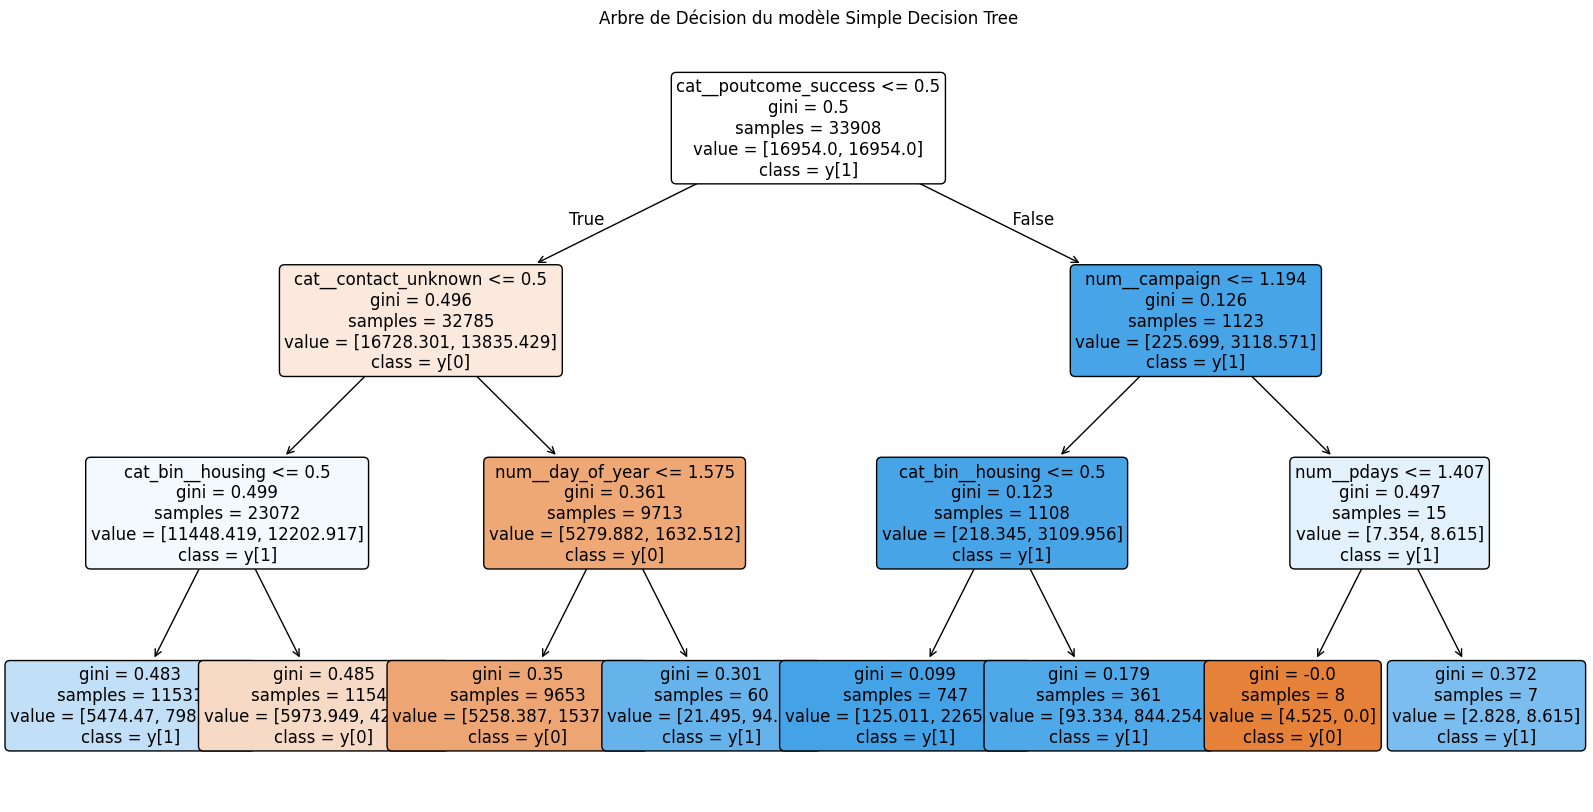

In [29]:
decision_tree = model_tree.named_steps['SDP']

plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree,
               feature_names=model_tree.named_steps['preprocessing'].get_feature_names_out(),
               class_names=True,
               filled=True,  #paint nodes to indicate majority class for classification    
               rounded=True,   #draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.  
               fontsize=12)      

plt.title("Arbre de Décision du modèle Simple Decision Tree")
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 10)

In [31]:
model_tree2 = Pipeline([
    ('preprocessing', preprocessor),
    ('SDP', DecisionTreeClassifier(max_depth=3, class_weight= 'balanced'))
])

model_tree2.fit(X_train2, y_train2)
model_run_classification(model_tree2,'Simple Decision Tree Model 2 \n random_state = 10', X_train2, X_test2, y_train2, y_test2)
model_run_classification(model_tree,'Simple Decision Tree Model 1 \n random_state = 42', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Simple Decision Tree Model 2 
 random_state = 10 ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.6614   |   0.6611  
Precision    |   0.2057   |   0.2016  
Recall       |   0.6589   |   0.6491  
F1 Score     |   0.3135   |   0.3076  
ROC AUC      |   0.7107   |   0.7036  
--------------------------------------
--- Résultats pour le modèle : Simple Decision Tree Model 1 
 random_state = 42 ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.6625   |   0.6582  
Precision    |   0.2045   |   0.2054  
Recall       |   0.6603   |   0.6467  
F1 Score     |   0.3123   |   0.3118  
ROC AUC      |   0.7117   |   0.7024  
--------------------------------------


{'Accuracy': 0.6582323277006105,
 'Precision': 0.20539906103286384,
 'Recall': 0.6467110125646711,
 'F1 Score': 0.3117762337430964,
 'ROC AUC': 0.7024218654246844}

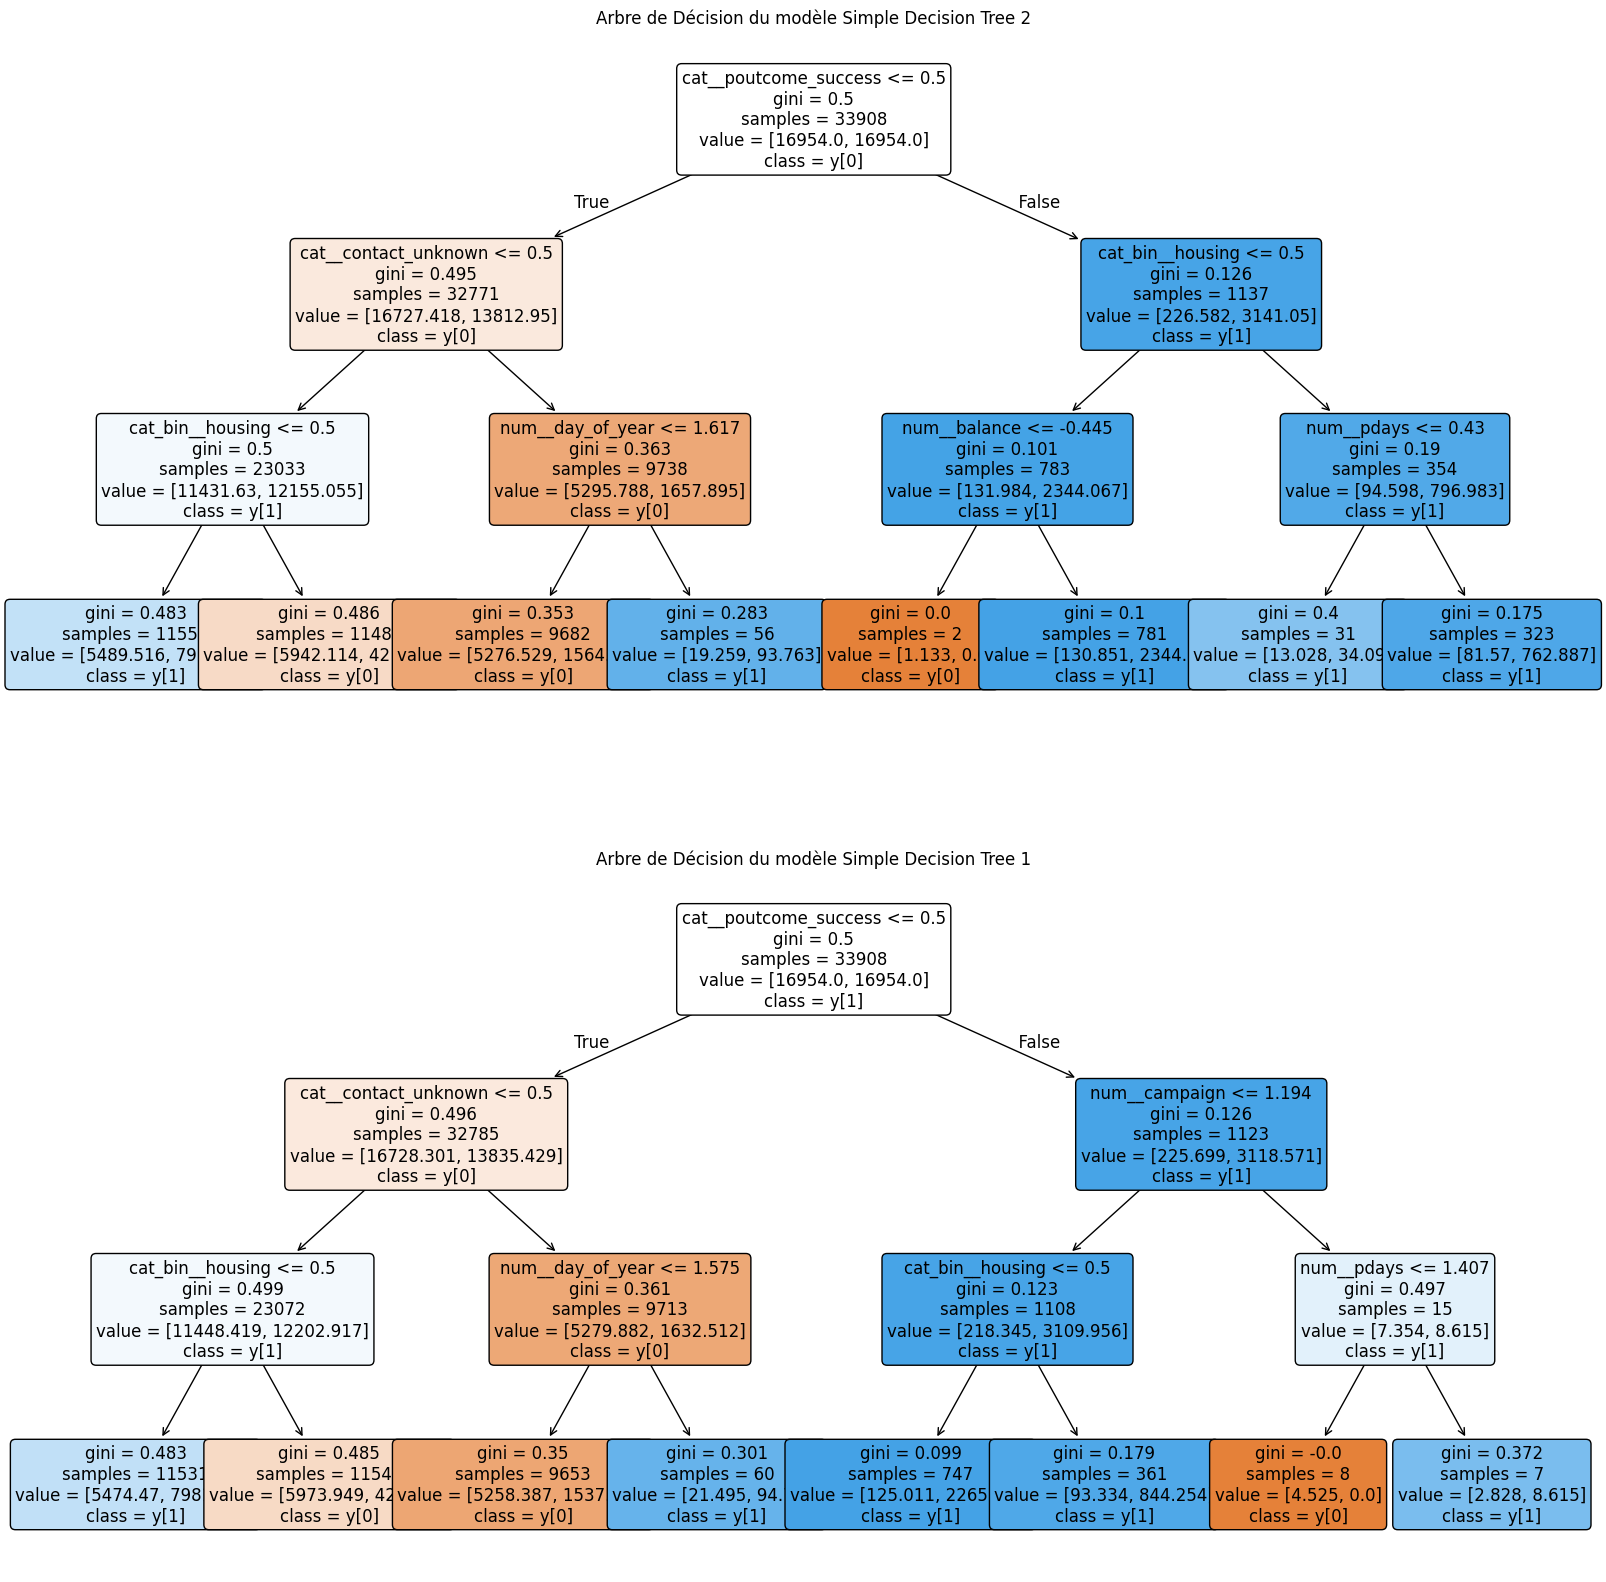

In [32]:

plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
decision_tree = model_tree2.named_steps['SDP']
tree.plot_tree(decision_tree,
               feature_names=model_tree.named_steps['preprocessing'].get_feature_names_out(),
               class_names=True,
               filled=True,  
               rounded=True,   
               fontsize=12)      

plt.title("Arbre de Décision du modèle Simple Decision Tree 2")

plt.subplot(2,1,2)
decision_tree = model_tree.named_steps['SDP']
tree.plot_tree(decision_tree,
               feature_names=model_tree.named_steps['preprocessing'].get_feature_names_out(),
               class_names=True,
               filled=True,    
               rounded=True,    
               fontsize=12)      

plt.title("Arbre de Décision du modèle Simple Decision Tree 1")
plt.show()

What can you tell about the two trees?


<font color= 'mediumorchid'>  They are similar --> modèle stable, peu de variance : modèle robuste  </font>

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

(0.0, 100.0)

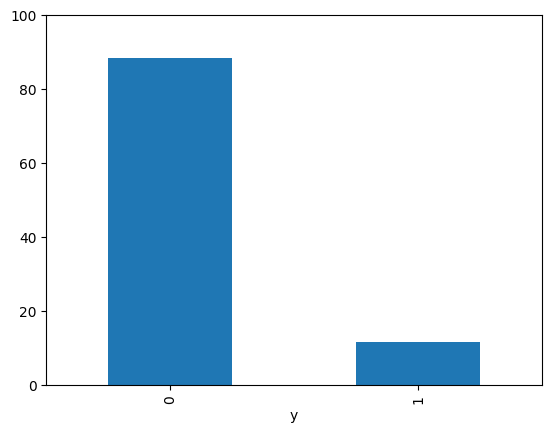

In [33]:
# Test if the target is balanced
((y.value_counts()/y.count())*100).plot.bar()
plt.ylim([0,100])

In [34]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_val_score, cross_validate
metrics = ['accuracy', 'precision', 'recall', 'f1']

results_1 = cross_validate(model_tree, X_train, y_train,scoring=metrics, cv=5)
results_1


{'fit_time': array([0.19062185, 0.1855197 , 0.18349624, 0.23297501, 0.39248872]),
 'score_time': array([0.03652644, 0.03531098, 0.03768945, 0.04226565, 0.04759669]),
 'test_accuracy': array([0.66248894, 0.66337364, 0.66337364, 0.66450376, 0.65816251]),
 'test_precision': array([0.20456334, 0.20620581, 0.20605584, 0.2045274 , 0.20015668]),
 'test_recall': array([0.66073698, 0.66709022, 0.66497462, 0.65438374, 0.64930114]),
 'test_f1': array([0.31240613, 0.3150315 , 0.31462023, 0.31164902, 0.30598802])}

In [35]:
results_2 = cross_validate(model_tree2, X_train2, y_train2,scoring=metrics, cv=5)
results_2

{'fit_time': array([0.23643208, 0.19626999, 0.18528676, 0.1753335 , 0.23045564]),
 'score_time': array([0.04372096, 0.03703189, 0.03575802, 0.0341773 , 0.05506992]),
 'test_accuracy': array([0.66012976, 0.67281038, 0.65025066, 0.66656835, 0.65683528]),
 'test_precision': array([0.20166074, 0.21709742, 0.19900688, 0.2068    , 0.20333075]),
 'test_recall': array([0.64070352, 0.68592965, 0.65452261, 0.65031447, 0.66037736]),
 'test_f1': array([0.30676692, 0.32980973, 0.30521383, 0.3138088 , 0.31092686])}

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Text(0.5, 1.0, 'Model 2, seed 10')

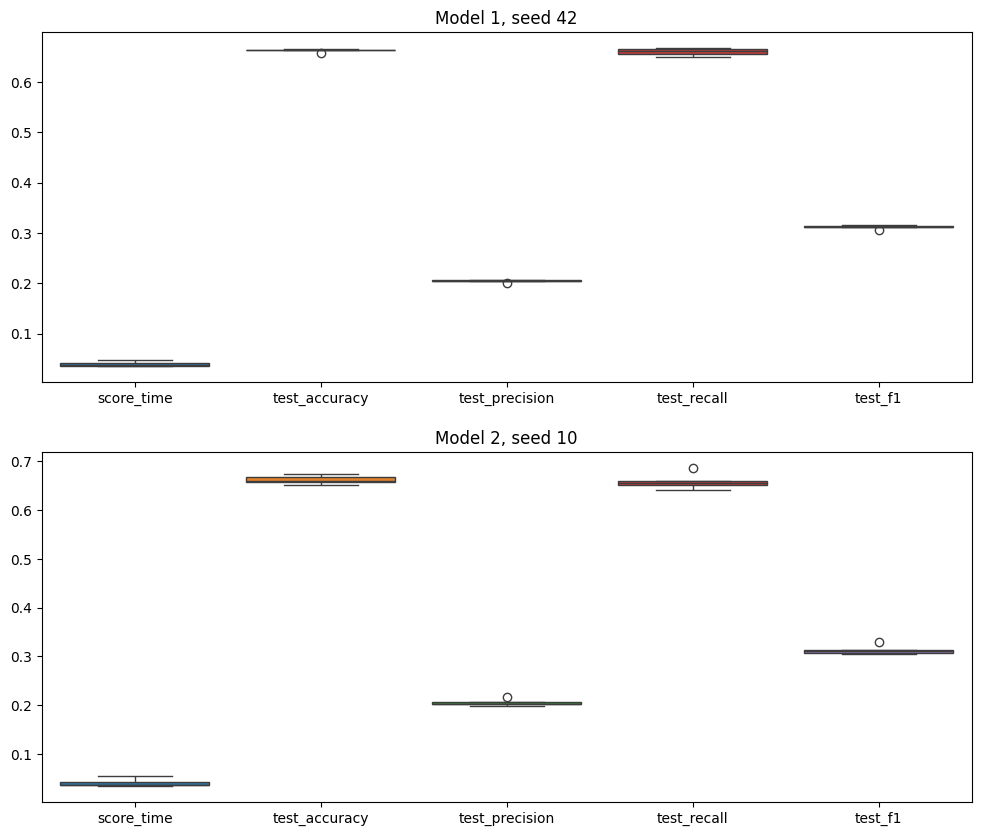

In [36]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(pd.DataFrame(results_1).drop(columns='fit_time'))
plt.title('Model 1, seed 42')

plt.subplot(2,1,2)
sns.boxplot(pd.DataFrame(results_2).drop(columns='fit_time'))
plt.title('Model 2, seed 10')

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'SDP__max_depth': np.arange(3, 16, 2)
}

grid = GridSearchCV(model_tree, param_grid, cv=5, scoring='f1', #equilibre entre precision et recall 
                             return_train_score=True,
                             verbose=10)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START SDP__max_depth=3............................................
[CV 1/5; 1/7] END SDP__max_depth=3;, score=(train=0.312, test=0.312) total time=   0.1s
[CV 2/5; 1/7] START SDP__max_depth=3............................................
[CV 2/5; 1/7] END SDP__max_depth=3;, score=(train=0.312, test=0.315) total time=   0.1s
[CV 3/5; 1/7] START SDP__max_depth=3............................................
[CV 3/5; 1/7] END SDP__max_depth=3;, score=(train=0.312, test=0.315) total time=   0.1s
[CV 4/5; 1/7] START SDP__max_depth=3............................................
[CV 4/5; 1/7] END SDP__max_depth=3;, score=(train=0.312, test=0.312) total time=   0.1s
[CV 5/5; 1/7] START SDP__max_depth=3............................................
[CV 5/5; 1/7] END SDP__max_depth=3;, score=(train=0.314, test=0.306) total time=   0.1s
[CV 1/5; 2/7] START SDP__max_depth=5............................................
[CV 1/5; 2/7] 

,estimator,Pipeline(step...ax_depth=3))])
,param_grid,"{'SDP__max_depth': array([ 3, 5..., 11, 13, 15])}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...), ...]"


In [38]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results[['params', 
              'mean_test_score', 
              'mean_train_score', 
              'std_train_score',
              'std_train_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score,mean_train_score,std_train_score,std_train_score
1,{'SDP__max_depth': 5},0.428286,0.439373,0.008054,0.008054
2,{'SDP__max_depth': 7},0.425676,0.443643,0.026498,0.026498
3,{'SDP__max_depth': 9},0.397992,0.441973,0.022353,0.022353
4,{'SDP__max_depth': 11},0.390926,0.473837,0.017779,0.017779
5,{'SDP__max_depth': 13},0.385255,0.531688,0.016480,0.016480
6,{'SDP__max_depth': 15},0.365584,0.563966,0.026666,0.026666
0,{'SDP__max_depth': 3},0.311958,0.312394,0.000795,0.000795


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [39]:
grid.best_params_

{'SDP__max_depth': np.int64(5)}

In [40]:
model_tree3 = Pipeline([
    ('preprocessing', preprocessor),
    ('SDP', DecisionTreeClassifier(random_state=42, class_weight= 'balanced'))
])


model_tree3.set_params(**grid.best_params_).fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('SDP', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
model_run_classification(model_tree3,'Simple Decision Tree Model 3 _ après grid search', X_train, X_test, y_train, y_test)
model_run_classification(model_tree,'Simple Decision Tree Model 1', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Simple Decision Tree Model 3 _ après grid search ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.8704   |   0.8634  
Precision    |   0.4420   |   0.4285  
Recall       |   0.4421   |   0.4228  
F1 Score     |   0.4420   |   0.4256  
ROC AUC      |   0.7513   |   0.7333  
--------------------------------------
--- Résultats pour le modèle : Simple Decision Tree Model 1 ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.6625   |   0.6582  
Precision    |   0.2045   |   0.2054  
Recall       |   0.6603   |   0.6467  
F1 Score     |   0.3123   |   0.3118  
ROC AUC      |   0.7117   |   0.7024  
--------------------------------------


{'Accuracy': 0.6582323277006105,
 'Precision': 0.20539906103286384,
 'Recall': 0.6467110125646711,
 'F1 Score': 0.3117762337430964,
 'ROC AUC': 0.7024218654246844}

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

<font color= 'mediumorchid'> Le modèle est de façon générale assez mauvais. l'accuracy est de 0.8913 , mais ça correspond en fait au pourentage de 0, car la targeet est imbalenced entre 0 et 1 !! Le modèle prédit les 0 en fait. Et on le voit sur le recall : il est de 0,20 au mieux avec un max_depth de 9. Ca veut dire qu'on prédit 20% des positifs qu'on devrait prédire, il ne détecte que 20% des TP donc les gens qui vont souscrire un long terme déposite !!. La précision n'est pas très bonne non plus : 0.6163  . le modèle a raison de prédire positif dans 62% des cas. Donc quand le modèle prédit qu'un client va souscrire un long terme deposit, il a 40% de se tromper.                            
UPDATE                                                          
Après avoir utilisé : class_weight= 'balanced' et F1 score                                                     
J'ai changé les F1 score car potentiellement on veut être sûr qu'un client rembourse, mais sans louper de client potentiels (ne pas avoir trop de FN). L'équilibre en recall et precision semble plus interessant ici . Le ROC auc ne semble pas trop mauvais avec 73% environ.  </font>

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [42]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [43]:
# gridsearch for the Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

model_RF = Pipeline([
    ('preprocessing', preprocessor),
    ('RF', RandomForestClassifier(random_state=42, class_weight="balanced"))])


In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'RF__n_estimators': np.arange(10, 1001, 100),
    'RF__max_depth': np.arange(3, 16, 2) 
}

random_search = RandomizedSearchCV(model_RF, 
                                   param_distributions=param_distributions,
                                   n_iter=20, 
                                   cv=5, 
                                   scoring='f1', 
                                   return_train_score=True,
                                   verbose=10,
                                   n_jobs=-1, 
                                   random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'RF__max_depth': array([ 3, 5..., 11, 13, 15]), 'RF__n_estimators': array([ 10, 1...10, 810, 910])}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,10
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [45]:
random_results = pd.DataFrame(grid.cv_results_)

random_results[['params', 
              'mean_test_score', 
              'mean_train_score', 
              'std_train_score',
              'std_train_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score,mean_train_score,std_train_score,std_train_score
1,{'SDP__max_depth': 5},0.428286,0.439373,0.008054,0.008054
2,{'SDP__max_depth': 7},0.425676,0.443643,0.026498,0.026498
3,{'SDP__max_depth': 9},0.397992,0.441973,0.022353,0.022353
4,{'SDP__max_depth': 11},0.390926,0.473837,0.017779,0.017779
5,{'SDP__max_depth': 13},0.385255,0.531688,0.016480,0.016480
6,{'SDP__max_depth': 15},0.365584,0.563966,0.026666,0.026666
0,{'SDP__max_depth': 3},0.311958,0.312394,0.000795,0.000795


In [46]:
best_params_model_RF = random_search.best_params_
best_params_model_RF

{'RF__n_estimators': np.int64(810), 'RF__max_depth': np.int64(13)}

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

<font color='mediumorchid'> le model propose 810  </font>

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [48]:
model_RF = Pipeline([
    ('preprocessing', preprocessor),
    ('RF', RandomForestClassifier(random_state=42, class_weight="balanced" ))])


model_RF.set_params(**best_params_model_RF).fit(X_train, y_train)
model_run_classification(model_RF,'Random Forest Model', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Random Forest Model ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.8904   |   0.8493  
Precision    |   0.5203   |   0.3998  
Recall       |   0.7114   |   0.5159  
F1 Score     |   0.6010   |   0.4505  
ROC AUC      |   0.9142   |   0.7810  
--------------------------------------


{'Accuracy': 0.8493320357427232,
 'Precision': 0.3997709049255441,
 'Recall': 0.515890613451589,
 'F1 Score': 0.4504678928686673,
 'ROC AUC': 0.7809665474452825}

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [49]:
model_RF.named_steps['RF'].feature_importances_

array([0.10653596, 0.10615906, 0.05361161, 0.06423175, 0.0420723 ,
       0.16657518, 0.00661628, 0.011311  , 0.00471328, 0.00316645,
       0.00697047, 0.00895518, 0.0050836 , 0.00593443, 0.00553632,
       0.00715159, 0.00398792, 0.00151686, 0.00716283, 0.01619151,
       0.01340667, 0.00851659, 0.01007109, 0.01141094, 0.00504459,
       0.0412382 , 0.00812216, 0.06268831, 0.01491494, 0.00600689,
       0.08058002, 0.02447142, 0.00378304, 0.05725308, 0.0190085 ])

<Axes: ylabel='Feature'>

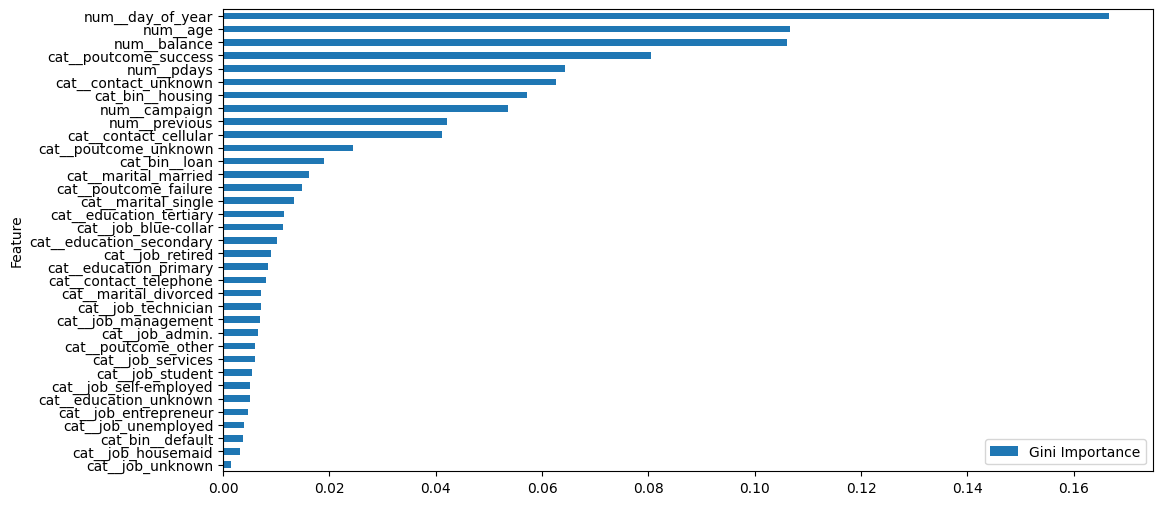

In [50]:
# display features' importance => use the RandomForest Object
importances = model_RF.named_steps['RF'].feature_importances_
feature_imp_df = pd.DataFrame({'Feature': model_RF.named_steps['preprocessing'].get_feature_names_out(),
                                'Gini Importance': importances}).sort_values('Gini Importance', ascending=True) 

feature_imp_df.set_index('Feature').plot.barh(figsize=(12,6))


What is the most important feature?

<font color='mediumorchid'> the  most important feature is : cat__poutcome_success --> outcome of the previous marketing campaign when success  </font>

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [51]:
best_params_model_RF
params = {key.replace('RF__', ''): value for key, value in best_params_model_RF.items()}
params

{'n_estimators': np.int64(810), 'max_depth': np.int64(13)}

In [52]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)
classifier_for_rfecv = RandomForestClassifier(**params,random_state=42,  class_weight="balanced")

rfecv_selector = RFECV(
    estimator=classifier_for_rfecv,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
    verbose=10
)

rfecv_RF = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', rfecv_selector),
    ('RF',  RandomForestClassifier(**params,random_state=42,  class_weight="balanced"))
])

rfecv_RF.fit(X_train, y_train)

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


,steps,"[('preprocessing', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
model_run_classification(rfecv_RF,'Random Forest Model, RFECV', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Random Forest Model, RFECV ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.9012   |   0.8620  
Precision    |   0.5620   |   0.4321  
Recall       |   0.6735   |   0.4871  
F1 Score     |   0.6127   |   0.4580  
ROC AUC      |   0.9231   |   0.7802  
--------------------------------------


{'Accuracy': 0.8619835441918074,
 'Precision': 0.4321311475409836,
 'Recall': 0.4870657797487066,
 'F1 Score': 0.45795691452397497,
 'ROC AUC': 0.7801717382180674}

In [54]:
print(f"Optimal number of features: {rfecv_selector.n_features_}")
print(f"Selected features: {rfecv_selector.support_}")

Optimal number of features: 9
Selected features: [ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True False False  True False]


In [55]:
print(len(model_RF.named_steps['preprocessing'].get_feature_names_out()))
len(rfecv_selector .support_)

35


35

In [56]:
subset = model_RF.named_steps['preprocessing'].get_feature_names_out()[rfecv_selector .support_].tolist()
subset

['num__age',
 'num__balance',
 'num__campaign',
 'num__pdays',
 'num__previous',
 'num__day_of_year',
 'cat__contact_unknown',
 'cat__poutcome_success',
 'cat_bin__housing']

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

<font color='mediumorchid'> probably, it would have biased our model, and increase general performance but with low precison and recall </font> 

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [57]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [58]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [59]:
model_X = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', xgb.XGBClassifier(objective='binary:logistic'))])


model_X.fit(X_train, y_train)
model_run_classification(model_X,'XGBClassifier', X_train, X_test, y_train, y_test)


--- Résultats pour le modèle : XGBClassifier ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.9292   |   0.8912  
Precision    |   0.8926   |   0.6051  
Recall       |   0.4436   |   0.2616  
F1 Score     |   0.5927   |   0.3653  
ROC AUC      |   0.9250   |   0.7895  
--------------------------------------


{'Accuracy': 0.8911793329204636,
 'Precision': 0.6051282051282051,
 'Recall': 0.2616407982261641,
 'F1 Score': 0.3653250773993808,
 'ROC AUC': 0.7894786942844304}

In [60]:
from sklearn.model_selection import KFold, GridSearchCV

search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__subsample': [0.5, 0.7, 1]
  }
]


grid = GridSearchCV(
  model_X,
  param_grid=search_space,
  cv=3,
  scoring='f1',
  return_train_score=True,
  verbose=10,
)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits
[CV 1/3; 1/336] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5
[CV 1/3; 1/336] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 2/3; 1/336] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5
[CV 2/3; 1/336] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/3; 1/336] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5
[CV 3/3; 1/336] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.5;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 1/3; 2/336] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=50, clf__subsample=0.7
[CV 1/3; 2/336] END clf__learning_rate=0.

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"[{'clf__learning_rate': [0.01, 0.1, ...], 'clf__max_depth': range(3, 10), 'clf__n_estimators': [50, 100, ...], 'clf__subsample': [0.5, 0.7, ...]}]"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...), ...]"


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [61]:
grid_results = pd.DataFrame(grid.cv_results_)

grid_results[['params', 
              'mean_test_score', 
              'std_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score,std_test_score
214,"{'clf__learning_rate': 0.2, 'clf__max_depth': ...",0.366841,0.010936
239,"{'clf__learning_rate': 0.2, 'clf__max_depth': ...",0.366502,0.007178
211,"{'clf__learning_rate': 0.2, 'clf__max_depth': ...",0.366420,0.012673
319,"{'clf__learning_rate': 0.3, 'clf__max_depth': ...",0.365577,0.010260
275,"{'clf__learning_rate': 0.3, 'clf__max_depth': ...",0.365072,0.007206
...,...,...,...
36,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.000000,0.000000
37,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.000000,0.000000
26,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.000000,0.000000
24,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.000000,0.000000


In [62]:
grid.best_params_

{'clf__learning_rate': 0.2,
 'clf__max_depth': 6,
 'clf__n_estimators': 200,
 'clf__subsample': 0.7}

In [63]:
model_X = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', xgb.XGBClassifier(objective='binary:logistic'))])


model_X.set_params(**grid.best_params_).fit(X_train, y_train)
model_run_classification(model_X,'XGBClassifier', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : XGBClassifier ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.9354   |   0.8902  
Precision    |   0.9169   |   0.5943  
Recall       |   0.4878   |   0.2609  
F1 Score     |   0.6368   |   0.3626  
ROC AUC      |   0.9446   |   0.7861  
--------------------------------------


{'Accuracy': 0.8902061399628417,
 'Precision': 0.5942760942760943,
 'Recall': 0.2609016999260902,
 'F1 Score': 0.3626091422701592,
 'ROC AUC': 0.7860986380535345}

## Let's Conclude

Report your test set metrics for the three methods here

In [64]:
# Decision Tree on test set
model_run_classification(model_tree3,'Simple Decision Tree Model 3 _ après grid search', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Simple Decision Tree Model 3 _ après grid search ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.8704   |   0.8634  
Precision    |   0.4420   |   0.4285  
Recall       |   0.4421   |   0.4228  
F1 Score     |   0.4420   |   0.4256  
ROC AUC      |   0.7513   |   0.7333  
--------------------------------------


{'Accuracy': 0.863399097584712,
 'Precision': 0.42846441947565544,
 'Recall': 0.42276422764227645,
 'F1 Score': 0.4255952380952381,
 'ROC AUC': 0.7332941128406258}

In [65]:
# Random forest on test set
model_run_classification(rfecv_RF,'Random Forest Model', X_train, X_test, y_train, y_test)

--- Résultats pour le modèle : Random Forest Model ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.9012   |   0.8620  
Precision    |   0.5620   |   0.4321  
Recall       |   0.6735   |   0.4871  
F1 Score     |   0.6127   |   0.4580  
ROC AUC      |   0.9231   |   0.7802  
--------------------------------------


{'Accuracy': 0.8619835441918074,
 'Precision': 0.4321311475409836,
 'Recall': 0.4870657797487066,
 'F1 Score': 0.45795691452397497,
 'ROC AUC': 0.7801717382180674}

In [66]:
# XGBoost on test set
model_run_classification(model_X,'XGBClassifier', X_train, X_test, y_train, y_test)


--- Résultats pour le modèle : XGBClassifier ---
Métrique     |   Train    |    Test   
--------------------------------------
Accuracy     |   0.9354   |   0.8902  
Precision    |   0.9169   |   0.5943  
Recall       |   0.4878   |   0.2609  
F1 Score     |   0.6368   |   0.3626  
ROC AUC      |   0.9446   |   0.7861  
--------------------------------------


{'Accuracy': 0.8902061399628417,
 'Precision': 0.5942760942760943,
 'Recall': 0.2609016999260902,
 'F1 Score': 0.3626091422701592,
 'ROC AUC': 0.7860986380535345}

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

<font color = 'mediumorchid'> les 3 modèles sont relativement équivalents même si on note une légère amélioration avec le random forest et le XGBClassifier. Probablement qu'il faudrait changer de modèle pour gérer l'imbalance des positifs (il n'y a que 10% de 1 = yes ! ) On pourrait tenter un SVM par exemple . Il faudrait peut être avoir plus de data sur les clients qui ont souscrits (trouvé de nouvelles features sinon ? ) </font>

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

<font color = 'mediumorchid'> **Ensemble learning** : </font>                                   
Entrainer plusieurs modèles de ML pour concidérer l'ensemble des prédictions 

<font color = 'mediumorchid'> **Le modèle de bagging** </font>                              
Plusieurs entités d'un même model : simple décision tree par exemple, puis les entrainer sur une portion aléatoires (échantillonage de boostrapring, on replace les données dans le data set après = tirage avec remise). 
L'échantillonnage est donc diversifié. 
On regroupe ensuite les résultats de chaque modèle pour faire la prédiction finale. 
Ex le plus connu : random forest : arbres de décisions --> forêt aléatoires 
Les modèes sont Entrainés en parralèle. 
Les modèles sont relativement forts + overfitting --> réduit la varaince en regroupant

<font color = 'mediumorchid'> **Le modèle de boosting** </font> 
Entrainé l'un après l'autres plusieurs modèles relativement faibles, en demandant à chaque modèle de  corriger le précédent modèle. 
Les modèles sont entrainés en série
les modèles sont relativement faibeles : underfitting --> on réduit le biais ici 


<font color = 'mediumorchid'> Conclusion pour la bank : Le modèle du RF propose un équilibre entre F1 recall et précision tout en gardant un ROC AUC de 0.78 , soit pas si mal (et quasi identique que le modèle de Xboost). Il faudrait sans doute prendre plus de temps pour jauger les hyperparamètres du XGBclassifier (j'ai mis une gamme relativement courte basée sur des forum, il faudrait pousser un peu plus). Ici le RF étant plus équilibré, on ne loupe pas de client qui pourrait souscrire, mais en étant plus sûr qu'il rembourse. Avec la précaution qu'on est quand même en dessous de 0.5 ! Donc on est sûr que de 50% ce qui est presque le hasard ... </font>

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [67]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [68]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [69]:
# code here